# ch03.06. 기초통계 - 분포통계량
---
* 날짜:
* 이름:

## 학습내용
    - 백분위수, 사분위수
    - 왜도
    - 첨도

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  분포 통계
---

* 분포통계는 데이터의 위치나 모양을 확인

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```

* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [3]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.normal(0,1,1000)

* `a` 분포 그리기

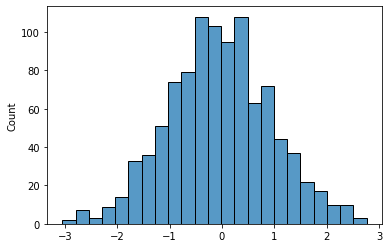

In [4]:
sns.histplot(a)
plt.show()

### **| 백분위수와 사분위수**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-03.png?raw=true width=800>
</p>

```
np.percentile(x,  percent)
np.quantile(x, percent_ratio)
```

* 하위 10% 에 위치한 값 확인

In [5]:
print(np.percentile(a,  10), np.quantile(a, 0.1))

-1.2991423253580128 -1.2991423253580128


* 하위 80% 에 위치한 값 확인

In [6]:
print(np.percentile(a,  80), np.quantile(a, 0.8))

0.7883967913601156 0.7883967913601156


### **| 왜도 (skew)**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-01.png?raw=true width=800>
</p>



\begin{align}
\text{skew} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

```
from scipy.stats import skew
skew(a)
```

* `a`의 왜도 구하기

In [7]:
from scipy.stats import skew
skew(a)

0.03385895323565712

* 세개의 데이터의 분포를 그리고 각각의 왜도도 구해봅니다.

```
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]
```

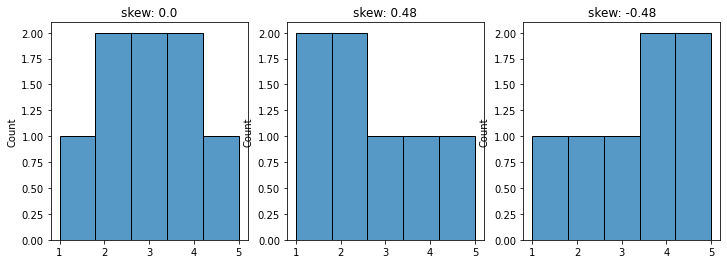

In [9]:
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]

plt.figure(figsize=(12,4))
for i,x  in enumerate([x1,x2,x3]):
  plt.subplot(1,3,i+1)
  sns.histplot(x,bins=5)
  plt.title(f'skew: {np.round(skew(x),2)}')
plt.show()

### **| 첨도(kurtosis)**


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-02.png?raw=true width=300>
</p>


\begin{align}
\text{kurtosis} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

```
from scipy.stats import kurtosis
kurtosis(a)
```

In [10]:
from scipy.stats import kurtosis
kurtosis(a)

-0.0467663244783294

* 세개의 데이터의 분포를 그리고 각각의 첨도도 구해봅니다.

```
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]
```

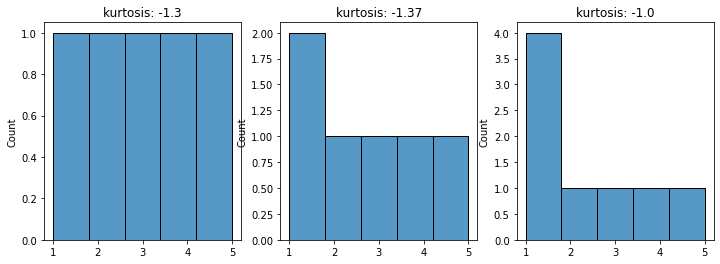

In [11]:
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]

plt.figure(figsize=(12,4))
for i,x  in enumerate([x1,x2,x3]):
  plt.subplot(1,3,i+1)
  sns.histplot(x,bins=5)
  plt.title(f'kurtosis: {np.round(kurtosis(x),2)}')
plt.show()

## 예제
---

#### **예제 01**

1. 지난 시간에 배운 scipy 라이브러리의 gamma 함수를 사용합니다. 

2. a값이 4인 감마함수로 부터 표본을 1000개 추출하고 `x3`로 바인딩합니다.

4. a값이 12인 감마함수로 부터 표본을 1000개 추출하고 `x4`로 바인딩합니다.

6. `x3`의 모든 요소에 -1을 곱한 후 `x2`로 바인딩합니다.

6. `x4`의 모든 요소에 -1을 곱한 후 `x1`로 바인딩합니다.

7. `x1, x2, x3, x4`의 분포를 각각 그립니다.

7. `x1, x2, x3, x4`의 왜도를 각각 구합니다.

7. `x1, x2, x3, x4`의 첨도를 각각 구합니다.


In [12]:
import scipy as sp
from scipy.stats import *

In [13]:
a=4
gamma = sp.stats.gamma(a)

In [14]:
x3 = gamma.rvs(1000)

In [15]:
b=12
gamma = sp.stats.gamma(b)

In [16]:
x4 = gamma.rvs(1000)

In [17]:
x2 = x3 * -1

In [18]:
x1 = x4 * -1

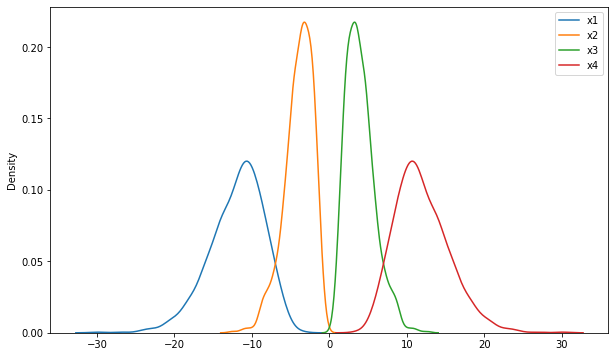

In [21]:
fig = plt.figure(figsize=(10,6))
xs = ['x1','x2','x3','x4']
for x in xs:
  sns.kdeplot(x=eval(x))
plt.legend(xs)
plt.show()

In [ ]:
print('x1왜도:', skew(x1))
print('x2왜도:', skew(x2))
print('x3왜도:', skew(x3))
print('x4왜도:', skew(x4))

x1왜도: -0.5853442790742457
x2왜도: -1.2163213305866085
x3왜도: 1.2163213305866085
x4왜도: 0.5853442790742457


In [ ]:
print('x1첨도:', kurtosis(x1))
print('x2첨도:', kurtosis(x2))
print('x3첨도:', kurtosis(x3))
print('x4첨도:', kurtosis(x4))

x1첨도: 0.2662803329205885
x2첨도: 2.693688267971524
x3첨도: 2.693688267971524
x4첨도: 0.2662803329205885


#### **예제 02**

타이타닉 데이터셋을 가져오고, 수치자료형 변수들의 **산포통계**와 **분포통계**를 정리하세요.

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 수치형 변수들 바인딩
age = test['Age'].dropna() #나이
SibSp = test['SibSp'].dropna() # 형제자매 또는 배우자의 수
Parch = test['Parch'].dropna() # 자식의 수
Fare = test['Fare'].dropna() #요금

In [ ]:
# 분산
print('나이 분산값:', np.var(age, ddof=1))
print('형제자매 또는 배우자 수 분산값:', np.var(SibSp, ddof=1))
print('자식 수 분산값:', np.var(Parch, ddof=1))
print('요금 분산값:', np.var(Fare, ddof=1))

나이 분산값: 201.10669538455937
형제자매 또는 배우자 수 분산값: 0.8041777104632064
자식 수 분산값: 0.9632026436267241
요금 분산값: 3125.6570743195775


In [ ]:
# 표준편차
print('나이 표준편차:', np.std(age, ddof=1))
print('형제자매 또는 배우자 수 표준편차:', np.std(SibSp, ddof=1))
print('자식 수 표준편차:', np.std(Parch, ddof=1))
print('요금 표준편차:', np.std(Fare, ddof=1))

나이 표준편차: 14.18120923562442
형제자매 또는 배우자 수 표준편차: 0.8967595611217125
자식 수 표준편차: 0.9814288785371684
요금 표준편차: 55.90757617997383


In [ ]:
# 범위,  사분위 범위
print('나이 범위:', np.ptp(age), '\t\t\t', '나이 사분위 범위:', np.quantile(age, .75)-np.quantile(age, .25))
print('형제자매 또는 배우자 수 범위:', np.ptp(SibSp), '\t', '형제자매 또는 배우자 수 사분위 범위:', np.quantile(SibSp, .75)-np.quantile(SibSp, .25))
print('자식 수 범위:', np.ptp(Parch), '\t\t\t', '자식 수 사분위 범위:', np.quantile(Parch, .75)-np.quantile(Parch, .25))
print('요금 범위:', np.ptp(Fare), '\t\t\t', '요금 사분위 범위:', np.quantile(Fare, .75)-np.quantile(Fare, .25))

나이 범위: 75.83 			 나이 사분위 범위: 18.0
형제자매 또는 배우자 수 범위: 8 	 형제자매 또는 배우자 수 사분위 범위: 1.0
자식 수 범위: 9 			 자식 수 사분위 범위: 0.0
요금 범위: 512.3292 			 요금 사분위 범위: 23.6042


In [ ]:
# 왜도
print('나이 왜도:', skew(age))
print('형제자매 또는 배우자 수 왜도:', skew(SibSp))
print('자식 수 왜도:', skew(Parch))
print('요금 왜도:', skew(Fare))

나이 왜도: 0.45529229694892764
형제자매 또는 배우자 수 왜도: 4.153363487531833
자식 수 왜도: 4.637742407278109
요금 왜도: 3.6739366758439074


In [ ]:
# 첨도
print('나이 첨도:', kurtosis(age))
print('형제자매 또는 배우자 수 첨도:', kurtosis(SibSp))
print('자식 수 첨도:', kurtosis(Parch))
print('요금 첨도:', kurtosis(Fare))

나이 첨도: 0.06450884549029245
형제자매 또는 배우자 수 첨도: 26.168481893193842
자식 수 첨도: 31.023701676373854
요금 첨도: 17.69307416976227
